In [1]:
# Imports
import matplotlib.pyplot as plt
import csv
import numpy as np
from numpy import genfromtxt

In [10]:
# Load from csvs in folder "data_beta_t"
fixed_beta_losses = np.zeros(6,dtype=object) # Placeholder values
unfix_beta_losses = np.zeros(5,dtype=object) # Placeholder values

fixed_beta_strings = ['7', '8', '9', '10', '100', '1000']
unfix_beta_strings = ['exp', 'log', 'identity', 'square', 'log_square']

for i, suffix in enumerate(fixed_beta_strings):
    fixed_beta_losses[i] = np.array(genfromtxt('data_beta_t/losses_beta_'+suffix+'.csv', delimiter=','))
    
for i, suffix in enumerate(unfix_beta_strings):
    unfix_beta_losses[i] = np.array(genfromtxt('data_beta_t/losses_beta_'+suffix+'.csv', delimiter=','))

In [11]:
# Calculate standard deviation and mean
fixed_error = np.array([np.std(L, axis=0) for L in fixed_beta_losses])
unfix_error = np.array([np.std(L, axis=0) for L in unfix_beta_losses])
fixed_mean = np.array([np.mean(L, axis=0) for L in fixed_beta_losses])
unfix_mean = np.array([np.mean(L, axis=0) for L in unfix_beta_losses])

In [12]:
# Get shape
K = unfix_mean.shape[0]
T = unfix_mean.shape[1]
NB_FIXED = len(fixed_beta_strings)
NB_UNFIX = len(unfix_beta_strings)
NB_REPEATS = fixed_beta_losses[0].shape[0]

In [21]:
[y if y == 1 else 2 for y in [1 ,2, 3] ]

[1, 2, 2]

C:\Users\oilio\Miniconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


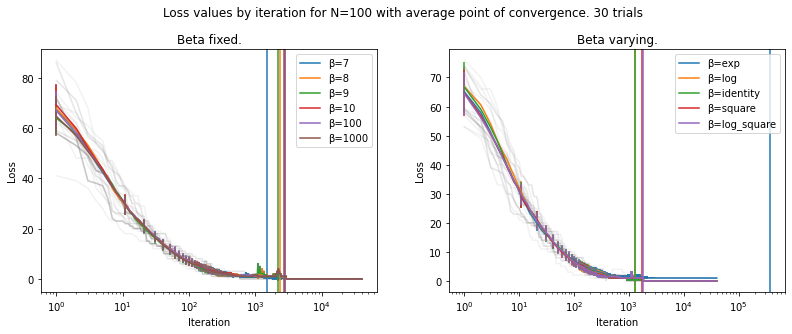

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(5)

# Plot values - beta fixed
c_off=0
for i in range(NB_FIXED):
    for k in range(K):
        x1, y1   = np.arange(1, T+1), fixed_beta_losses[i][k]
        ax1.plot(x1,y1,color='grey', alpha=0.1)
        
    # Plot mean and error
    ax1.plot(x1, fixed_mean[i], label='β='+fixed_beta_strings[i])
    
    # Get colour
    curr_color = ax1.get_lines()[(i+1)*(K+1)-1+c_off].get_color()
    ax1.errorbar(x1, fixed_mean[i], yerr=fixed_error[i],fmt='none',color=curr_color, errorevery=10)
    
    # Plot point at which mean loss is less than 1.
    
    try:
        x_win = int(np.mean([min(indices) for indices in [np.where(losses==0)[0] for losses in fixed_beta_losses[i]] if len(indices) != 0]))
        ax1.axvline(x=x_win,color=curr_color)
        c_off += 1
    except:
        x_win = None
        
# Plot values - beta varies  
c_off=0
for i in range(NB_UNFIX):
    
    for k in range(K):
        x2, y2   = np.arange(1, T+1), unfix_beta_losses[i][k]    
        ax2.plot(x2,y2,color='grey', alpha=0.1)
    
    # Plot mean and error
    ax2.plot(x2, unfix_mean[i], label='β='+unfix_beta_strings[i])
    curr_color = ax2.get_lines()[(i+1)*(K+1)-1+c_off].get_color()
    ax2.errorbar(x2, unfix_mean[i], yerr=unfix_error[i],fmt='none',color=curr_color, errorevery=10)
    
    try:
        x_win = int(np.mean([min(indices) for indices in [np.where(losses==0)[0] for losses in unfix_beta_losses[i]] if len(indices) != 0]))
        ax2.axvline(x=x_win,color=curr_color)
        c_off += 1
    except:
        x_win = None
    
# Set padding for.
fig.tight_layout(pad=5.0)

# Set scale for x axis.
ax1.set_xscale("log")
ax2.set_xscale("log")

# Title
fig.suptitle("Loss values by iteration for N=100 with average point of convergence. {0:d} trials".format(NB_REPEATS))
ax1.title.set_text('Beta fixed.')
ax2.title.set_text('Beta varying.')
ax1.set_xlabel("Iteration")
ax2.set_xlabel("Iteration")
ax1.set_ylabel("Loss")
ax2.set_ylabel("Loss")
ax1.legend()
ax2.legend()
plt.show()

In [14]:
for i in range(NB_FIXED):
    try: 
        x_win = int(np.mean([min(indices) for indices in [np.where(losses==0)[0] for losses in fixed_beta_losses[i]] if len(indices) != 0]))
        print(fixed_beta_strings[i],"\t", x_win)
    except:
        print(unfix_beta_strings[i], "did not converge in 400,000 iterations")
    
print("-----------")
for i in range(NB_UNFIX):
    try: 
        x_win = int(np.mean([min(indices) for indices in [np.where(losses==0)[0] for losses in unfix_beta_losses[i]] if len(indices) != 0]))
        print(unfix_beta_strings[i],"    \t", x_win)
    except:
        print(unfix_beta_strings[i], "did not converge in 400,000 iterations")

7 	 1491
8 	 2344
9 	 2176
10 	 2809
100 	 2807
1000 	 2678
-----------
exp     	 1081
log     	 1316
identity     	 1300
square     	 1725
log_square     	 1791


### Nice graphs ahead!

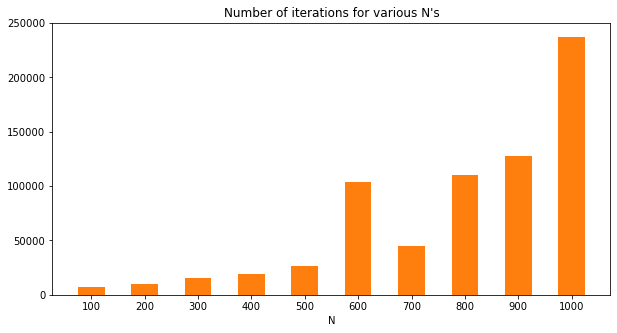

In [1]:



num_iter = [(100, 7001), (200, 9694), (300, 15257), (400, 19311), (500, 26290), (600, 103526), (700, 44878), (800, 110531), (900, 127914), (1000, 237338)]

plt.figure(figsize=(10, 5), facecolor='white')
x_values, y_values = zip(*num_iter)
plt.bar(x_values, y_values)
plt.bar(x_values, y_values, width=50)
plt.yticks(range(0, 300000, 50000))
plt.xticks(range(100, 1100, 100))
plt.xlabel('N')
plt.title('Number of iterations for various N\'s')
plt.show()



In [ ]:

num_iter = 100901
MAX_ITERS = 500000

repeat = 10
values = values.reshape((repeat, MAX_ITERS))


max_error = len(np.sum(values, axis=0)[np.argwhere(np.sum(values, axis=0) > 0)])

plt.figure(figsize=(10, 5), facecolor='white')
plt.plot(np.arange(0, MAX_ITERS, 1), mean, label="Average")

plt.errorbar(np.arange(0, MAX_ITERS, 1), mean, yerr =error, xerr=None, fmt='none', color='red', errorevery=10000, label="Stdv")

plt.yticks(range(0, 1000, 100))
plt.yscale("log")
plt.axvline(x=max_error, color='red')
plt.text(x=max_error-40000, y=400, s='Loss=0', color='red', fontsize=12)
plt.ylabel('Loss function')
plt.xlabel('Number of iterations')
plt.xlim([0, max_error + 100000])
plt.xticks(range(0, max_error + 100000, 100000))
plt.title(f"Number of iterations for beta(t)=log(t**2). Loss is always 0 after {max_error} iter. Repeated 10 times.") # Need to indicate which beta function is used
plt.legend(loc="best")
plt.savefig("beta_log(t**2)_10rep.png") # Need to indicate which beta function is used 
plt.show()


In [ ]:
num_iter = [('10', 106778),('100',100901), ('500',100901), ('1000',100901)]
x = ['6', '7', '8', '9', '10','100','500','1000']
y = [6017860,158823,132893, 132309, 106778, 100901, 100901, 100901]

plt.figure(figsize=(10, 5), facecolor='white')
plt.bar(x,y)
plt.yscale("log")
plt.xlabel('β')
plt.title('Number of iterations for various fixed β\'s (log scale)')
plt.show()